# Comparison of CSV, HDF5, and Feather for Reading and Writing Data in Pandas
The CSV, HDF5, and Feather file types are compared for writing speed, reading speed, and file size for increasingly large Pandas DataFames. DataFrames have $2^n$ row where $n = 5,\cdots,24$. Random data is generated using `numpy.random.normal`,  the timeit library is used for measuring read and write times (repeated 5 times on each operation where the best times are used for comparison), and single column DataFrames are used. 

Please note, running this notebook will generate about 1.7GB of test data.

In [2]:
import os
import pyarrow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
print(f"Pandas version: {pd.__version__}")
print(f"Pyarrow version: {pyarrow.__version__}")

Pandas version: 1.3.3
Pyarrow version: 6.0.0


In [4]:
# Dictionary To Hold Results:
results = {
    'write_times' : {
        'csv' : {},
        'hdf' : {}, 
        'feather' : {}
    }, 
    'read_times' : {
        'csv' : {}, 
        'hdf' : {}, 
        'feather' : {}
    },
    'sizes' : {
        'csv': {}, 
        'hdf': {},
        'feather': {}
    }
}

In [5]:
# Collect Data:
n_rows = []
for n in range(5, 25):
    # Number of Rows:
    n_rows.append(2**n)

    # Create Dataframe:
    df = pd.DataFrame({'data' : np.random.normal(0,1,2**n)})

    # Write Times:
    hdf_storing_time = %timeit -q -n5 -o df.to_hdf(f'test_hdf_{2**n}.hdf',key='hdf')
    results['write_times']['hdf'][2**n] = hdf_storing_time
    
    csv_storing_time = %timeit -q -n5 -o df.to_csv('test_csv_'+ str(2**n) + '.csv')
    results['write_times']['csv'][2**n] = csv_storing_time

    feather_storing_time = %timeit -q -n5 -o df.to_feather('test_feather_'+ str(2**n) + '.fth')
    results['write_times']['feather'][2**n] = feather_storing_time

    # Read Times:
    hdf_storing_time = %timeit -q -n5 -o pd.read_hdf('test_hdf_'+ str(2**n) + '.hdf',key='hdf')
    results['read_times']['hdf'][2**n] = hdf_storing_time
    
    csv_storing_time = %timeit -q -n5 -o pd.read_csv('test_csv_'+ str(2**n) + '.csv')
    results['read_times']['csv'][2**n] = csv_storing_time

    feather_storing_time = %timeit -q -n5 -o pd.read_feather('test_feather_'+ str(2**n) + '.fth')
    results['read_times']['feather'][2**n] = feather_storing_time

    # Sizes:
    hdf_size = os.stat('test_hdf_'+ str(2**n) + '.hdf').st_size/1024/1024
    results['sizes']['hdf'][2**n] = hdf_size

    csv_size = os.stat('test_csv_'+ str(2**n) + '.csv').st_size/1024/1024
    results['sizes']['csv'][2**n] = csv_size

    feather_size = os.stat('test_feather_'+ str(2**n) + '.fth').st_size/1024/1024
    results['sizes']['feather'][2**n] = feather_size


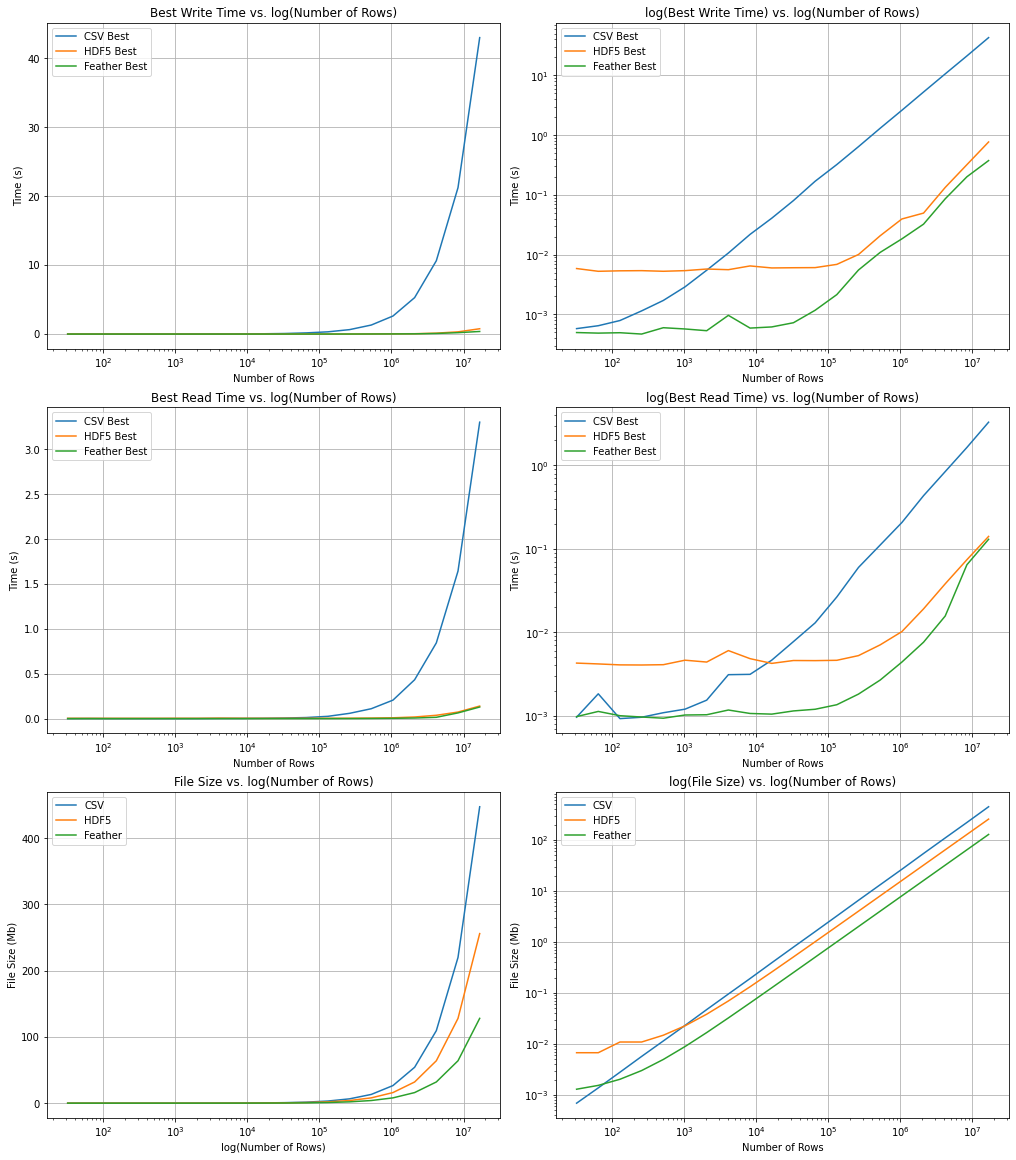

In [6]:
# Figure, Axes:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 16), constrained_layout=True)

# Plot Write Time Data: 
ax[0][0].plot(n_rows, [results['write_times']['csv'][n].best for n in n_rows], label='CSV Best')
ax[0][0].plot(n_rows, [results['write_times']['hdf'][n].best for n in n_rows], label='HDF5 Best')
ax[0][0].plot(n_rows, [results['write_times']['feather'][n].best for n in n_rows], label='Feather Best')
ax[0][0].set_xlabel('Number of Rows')
ax[0][0].set_ylabel('Time (s)')
ax[0][0].set_xscale('log')
ax[0][0].legend(loc='upper left')
ax[0][0].grid()
ax[0][0].set_title('Best Write Time vs. log(Number of Rows)')

ax[0][1].plot(n_rows, [results['write_times']['csv'][n].best for n in n_rows], label='CSV Best')
ax[0][1].plot(n_rows, [results['write_times']['hdf'][n].best for n in n_rows], label='HDF5 Best')
ax[0][1].plot(n_rows, [results['write_times']['feather'][n].best for n in n_rows], label='Feather Best')
ax[0][1].set_xlabel('Number of Rows')
ax[0][1].set_ylabel('Time (s)')
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].legend(loc='upper left')
ax[0][1].grid()
ax[0][1].set_title('log(Best Write Time) vs. log(Number of Rows)')

# Plot Read Time Data: 
ax[1][0].plot(n_rows, [results['read_times']['csv'][n].best for n in n_rows], label='CSV Best')
ax[1][0].plot(n_rows, [results['read_times']['hdf'][n].best for n in n_rows], label='HDF5 Best')
ax[1][0].plot(n_rows, [results['read_times']['feather'][n].best for n in n_rows], label='Feather Best')
ax[1][0].set_xlabel('Number of Rows')
ax[1][0].set_ylabel('Time (s)')
ax[1][0].set_xscale('log')
ax[1][0].legend(loc='upper left')
ax[1][0].grid()
ax[1][0].set_title('Best Read Time vs. log(Number of Rows)')

ax[1][1].plot(n_rows, [results['read_times']['csv'][n].best for n in n_rows], label='CSV Best')
ax[1][1].plot(n_rows, [results['read_times']['hdf'][n].best for n in n_rows], label='HDF5 Best')
ax[1][1].plot(n_rows, [results['read_times']['feather'][n].best for n in n_rows], label='Feather Best')
ax[1][1].set_xlabel('Number of Rows')
ax[1][1].set_ylabel('Time (s)')
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].legend(loc='upper left')
ax[1][1].grid()
ax[1][1].set_title('log(Best Read Time) vs. log(Number of Rows)')

# Plot Sizes Data: 
ax[2][0].plot(n_rows, [results['sizes']['csv'][n] for n in n_rows], label='CSV')
ax[2][0].plot(n_rows, [results['sizes']['hdf'][n] for n in n_rows], label='HDF5')
ax[2][0].plot(n_rows, [results['sizes']['feather'][n] for n in n_rows], label='Feather')
ax[2][0].set_xlabel('log(Number of Rows)')
ax[2][0].set_ylabel('File Size (Mb)')
ax[2][0].set_xscale('log')
ax[2][0].legend(loc='upper left')
ax[2][0].grid()
ax[2][0].set_title('File Size vs. log(Number of Rows)')

ax[2][1].plot(n_rows, [results['sizes']['csv'][n] for n in n_rows], label='CSV')
ax[2][1].plot(n_rows, [results['sizes']['hdf'][n] for n in n_rows], label='HDF5')
ax[2][1].plot(n_rows, [results['sizes']['feather'][n] for n in n_rows], label='Feather')
ax[2][1].set_xlabel('Number of Rows')
ax[2][1].set_ylabel('File Size (Mb)')
ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')
ax[2][1].legend(loc='upper left')
ax[2][1].grid()
ax[2][1].set_title('log(File Size) vs. log(Number of Rows)')

# Show Plot:
plt.show()

## Remarks
Generally speaking, Feather is the best performer, beating HDF5 and CSV over all the metrics tested. CSV performs the worst in all metrics for larger DataFrames ($>10^4$ rows). Interestingly, for smaller DataFrames CSV outperforms Feather in file sizes ($<10^2$ rows), has comparable performance to Feather in read times ($\leq10^3$ rows) outperforming HDF5 below $10^4$ rows, and outperforms HDF5 in write times below $\sim10^3$ rows.